Bem vindos a essa análise de dados sobre distribuição de Renda! 

Primeiramente gostaria de dizer que dois dias antes do prazo do PS do Grupo Turing perdi vários dias de código e tive que recomeçar de uma versão bem anterior, então infelizmente não pude fazer algumas coisas que gostaria. Mesmo assim, acho que ficou muito bom, espero que gostem!

Vamos começar pela analise de dados contínuos e posteriormente vamos dar uma olhada nos dados categóricos. Então farei uma conclusão da análise e finalizarei este documento com uma Regressão Logística que prevê se uma pessoa ganha mais ou menos de 50 mil Dólares por ano.

O que será feito na análise de dados contínuos:
1. Limpar dados.
2. Analisar a distribuição das idades.
3. Analisar a distribuição do tempo de estudo.
4. Analisar a distribuição das jornadas de trabalho.
5. Analisar relação idade X renda.
6. Pessoas que estudam mais, trabalham menos?

O que será feito na análise de dados categóricos:
1. Analisar a distribuição do estado civil. Existe alguma relação clara entre a renda e o estado civil das pessoas?
2. Analisar a distribuição do nível educacional (com a coluna “education”, que possui uma representação discreta/categórica da educação). Tente fazer essa análise conjuntamente com a renda.
3. Analisar a distribuição das classes de trabalho.###Colocar barras uma atras da outra
4. Analisar a distribuição das profissões.
5. A renda também está relacionada à etnia?
6. A renda está relacionada com o gênero?


### Análise Contínua

1. Primeiramente, vamos importar bibliotecas para analisar os dados e em seguida vamos estudar eles de cima, ver se alguma coluna tem muitos dados faltantes ou outliers e ver caso a caso o que podemos fazer.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [44]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#Vamos separar os dados entre alta e baixa renda.
a_renda=df[df['income']=='>50K']
b_renda=df[df['income']=='<=50K']

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


*Podemos ver que capital-gain e capital-loss possuem desvios padrão muito altos e os três quartis iguais a 0. Vamos estudar elas mais de perto.


**Vemos também que hours-per-week possui máximo muito específico, 99, vamos ver se esse valor ocorre muitas vezes pois pode ser uma aproximação de todos os valores acima de 100.

Proporção de cada valor:
 0        0.917453
15024    0.010482
7688     0.008294
7298     0.007440
99999    0.004877
           ...   
1111     0.000021
7262     0.000021
22040    0.000021
1639     0.000021
2387     0.000021
Name: capital-gain, Length: 123, dtype: float64


Text(0, 0.5, 'Frequência')

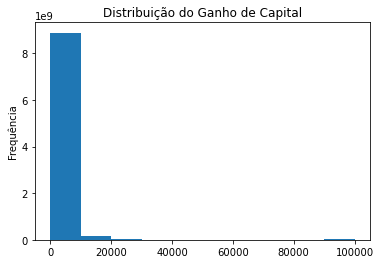

In [ ]:
#Vamos ver a distribuição de capital gain.
print('Proporção de cada valor:\n',df['capital-gain'].value_counts()/df['capital-gain'].value_counts().sum())
df['capital-gain'].plot(kind="hist", weights=df["fnlwgt"],title='Distribuição do Ganho de Capital').set_ylabel('Frequência')

Podemos ver que a enorme maioria dos dados são iguais a 0 e devem ser dados faltantes, vamos evitar usar essa coluna 'capital-gain'.

Proporção de cada valor:
 0       0.953340
1902    0.006189
1977    0.005168
1887    0.004814
2415    0.001438
          ...   
2489    0.000021
1911    0.000021
2080    0.000021
155     0.000021
2201    0.000021
Name: capital-loss, Length: 99, dtype: float64


Text(0, 0.5, 'Frequência')

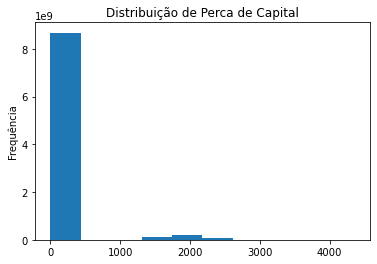

In [ ]:
#Vamos ver a distribuição de capital loss.

print('Proporção de cada valor:\n',df['capital-loss'].value_counts()/df['capital-loss'].value_counts().sum())
df['capital-loss'].plot(kind="hist", weights=df["fnlwgt"],title='Distribuição de Perca de Capital').set_ylabel('Frequência')

Analogamente a capital-gain, vamos evitar usar capital-loss. Vamos dar uma olhada em hours-per-week.

Text(0, 0.5, 'Frequência')

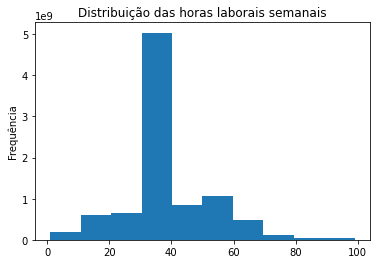

In [ ]:
df['hours-per-week'].plot(kind="hist", weights=df["fnlwgt"],title='Distribuição das horas laborais semanais').set_ylabel('Frequência')

Podemos ver que mesmo que 99 seja uma aproximação, ela não traz uma quantidade tão significativa de dados, portanto podemos prosseguir do jeito que está.

2. Analisar a distribuição das idades.

Text(0, 0.5, 'Frequência')

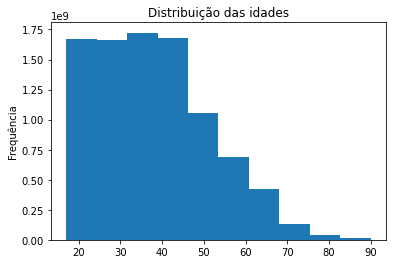

In [ ]:
df['age'].plot(kind="hist", weights=df["fnlwgt"],title='Distribuição das idades').set_ylabel('Frequência')

Observamos que as idades observadas se concentram fortemente na faixa aproximada de 20-50 anos, logo o estudo não traz conclusões tão significativas para a população da terceira idade quanto para os jovens.

3. Analisar a distribuição do tempo de estudo.

Text(0, 0.5, 'Frequência')

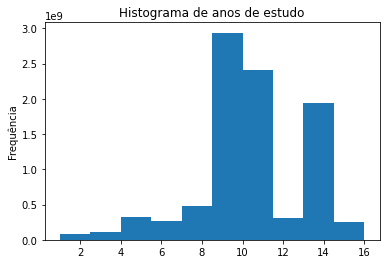

In [ ]:
df['educational-num'].plot(kind="hist",title=f'Histograma de anos de estudo', weights=df.fnlwgt).set_ylabel('Frequência')

Podemos ver que muitas pessoas desse estudo estudaram cerca de 10 anos, com um pico em 14 anos.

 Essa distribuição é muito específica para uma análise com tantos dados, provavelmente houve um erro na coleta das informações ou existe uma aproximação para informações faltantes, como se a pessoa está na faculdade e não respondeu quantos anos de estudo tem, é assumido que ela possui 14 anos de ensino.

4. Analisar a distribuição das jornadas de trabalho.


Text(0, 0.5, 'Frequência')

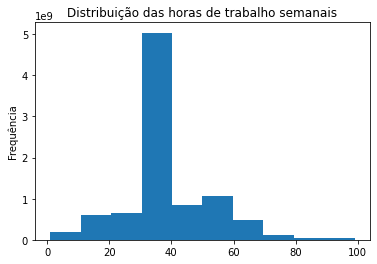

In [ ]:
df['hours-per-week'].plot(kind="hist", weights=df["fnlwgt"],ylabel='Frequência',title='Distribuição das horas de trabalho semanais').set_ylabel('Frequência')

Observamos que nos países analisados, é comum que as pessoas trabalhem até apenas 40 horas semanais para sua principal fonte de renda! 

5. Analisar relação idade X renda.


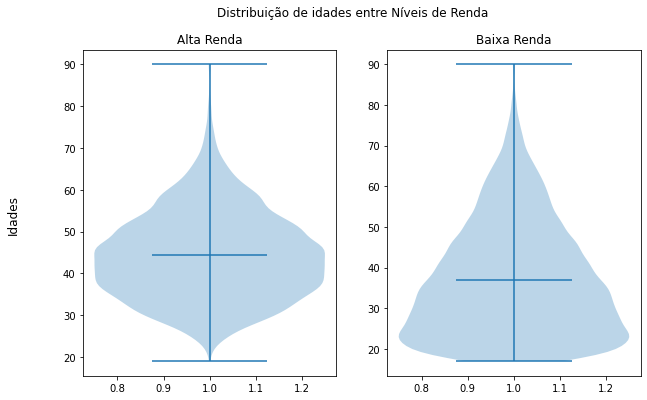

In [ ]:
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=(10, 6))

axs[0].set_title('Alta Renda')
axs[0].violinplot(a_renda['age'],showmeans=True)

axs[1].set_title('Baixa Renda')
axs[1].violinplot(b_renda['age'],showmeans=True)

fig.suptitle('Distribuição de idades entre Níveis de Renda')
fig.supylabel('Idades')

plt.show()

Como podemos ver as pessoas de alta renda tem em geral idades maiores que as de baixa renda. Nossos dados soam coerentes.

6. Pessoas que estudam mais, trabalham menos?

Text(0.5, 1.0, 'Anos de estudo e horas de trabalho semanais')

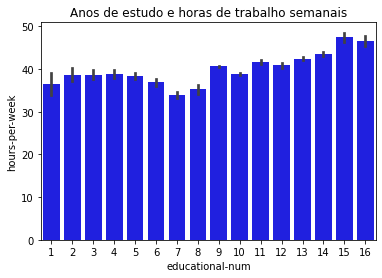

In [ ]:
sns.barplot(x=df["educational-num"], y=df["hours-per-week"],color='blue').set_title('Anos de estudo e horas de trabalho semanais')

Como podemos ver, na realidade pessoas que estudam mais tendem a ter semanas laborais mais longas!

### Análise Categórica

Vamos agora começar nossa análise categórica!

1. Analisar a distribuição do estado civil.

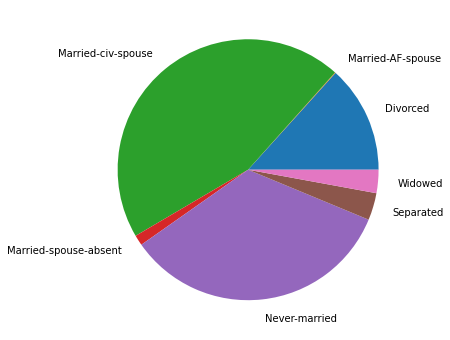

In [ ]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10, 6))
casamento=df.groupby(['marital-status']).sum()
ax.pie(casamento.fnlwgt,labels=casamento.index,labeldistance=1.15)
fig.set_facecolor('white')
plt.show()

Como podemos ver, uma grande parte das pessoas nesse banco de dados já foram ou são casadas. Vamos ver como ficam as diferenças de estado civil entre níveis de renda distintos.

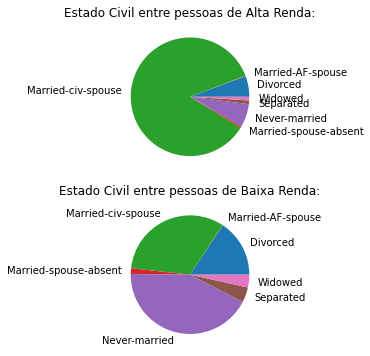

In [ ]:
#Analisar níveis de renda e relacionamentos.
fig, axs=plt.subplots(nrows=2,ncols=1,figsize=(10, 6))
fig.set_facecolor('white')

#Vamos analisar separadamente com os dados separados anteriormente,pessoas de Alta renda e de baixa renda.
casamento_a=a_renda.groupby(['marital-status']).sum()
casamento_b=b_renda.groupby(['marital-status']).sum()

axs[0].set_title('Estado Civil entre pessoas de Alta Renda:')
axs[0].pie(casamento_a.fnlwgt,labels=casamento_a.index,labeldistance=1.15)

axs[1].set_title('Estado Civil entre pessoas de Baixa Renda:')
axs[1].pie(casamento_b.fnlwgt,labels=casamento_b.index,labeldistance=1.15)

plt.show()

Entre as pessoas com menos renda há uma quantidade de nunca casados muito maior, o que faz sentido, pois, como vimos, a idade entre pessoas de baixa renda é menor.
Além disso constatamos que entre a Alta Renda a grande maioria das pessoas são casadas.

2. Analisar a distribuição do nível educacional por renda.

Text(0.5, 1.0, 'Nível Educacional e renda')

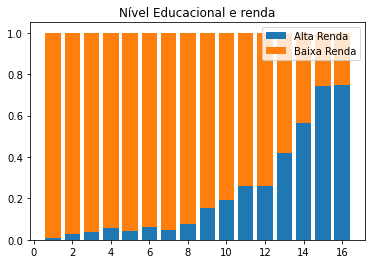

In [ ]:
ed_a=a_renda.groupby(['educational-num']).sum()
ed_b=b_renda.groupby(['educational-num']).sum()
# Vamos dividir os valores de cada coluna do gráfico pelo total da categoria de qualquer nível de renda
# para que possamos analisar as proporções em porcentagens.
total_ed=df.groupby(['educational-num']).sum().fnlwgt
plt.bar(x=ed_a.index,height=ed_a.fnlwgt/total_ed,label='Alta Renda')
plt.bar(x=ed_b.index,height=ed_b.fnlwgt/total_ed, bottom=ed_a.fnlwgt/total_ed,label='Baixa Renda')
plt.legend()
plt.title('Nível Educacional e renda')

É possível observar com clareza que conforme os anos de estudo aumentam, maior fica a proporção de pessoas de alta renda, além disso, para quem possui menos de 10 anos de ensino, a proporção da alta renda é especialmente baixa, com menos de 20% das pessoas sendo abastadas. Além disso entre quem possui mais de 14 anos de estudo, mais da metade das pessoas são da classe mais rica.

3. Analisar a distribuição das classes de trabalho.
Primeiro vamos ver a distribuição total dos trabalhos e depois faremos um gráfico separado para compreendermos bem a distribuição dentro das classes de renda.

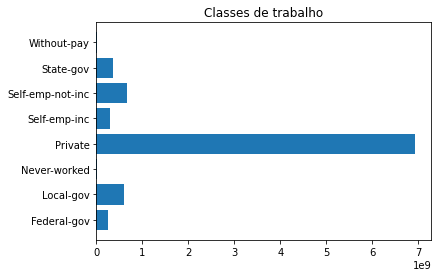

In [ ]:
workclass= df.groupby(['workclass']).sum()
plt.barh(y=workclass.index,width=workclass['fnlwgt'])
plt.title('Classes de trabalho')
plt.show()

Podemos ver que a maioria das pessoas trabalha no meio privado, com uma amostra muito pequena de pessoas que nunca trabalharam ou não recebem salário. Vamos ver a distribuição entre os níveis de renda.

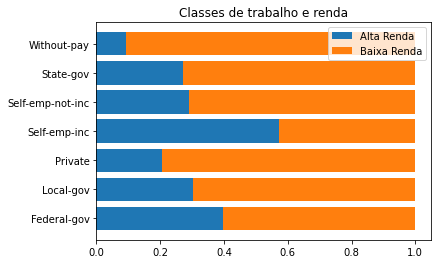

In [ ]:
workclass_a= a_renda.groupby(['workclass']).sum()
workclass_b= b_renda.groupby(['workclass']).sum()

total_wc=df.groupby(['workclass']).sum().fnlwgt
#Removi quem nunca trabalhou, pois eram pouquíssimas pessoas e não havia essa categoria em alta renda, impedindo o gráfico.
workclass_b.drop(axis=0,index='Never-worked',inplace=True)
total_wc.drop(axis=0,index='Never-worked',inplace=True)

plt.barh(y=workclass_a.index,width=workclass_a['fnlwgt']/total_wc,label='Alta Renda')
plt.barh(y=workclass_b.index,width=workclass_b['fnlwgt']/total_wc,left=workclass_a['fnlwgt']/total_wc,label='Baixa Renda')

plt.title('Classes de trabalho e renda')
plt.legend()
plt.show()

Constatamos que pessoas de Baixa Renda são maioria em todos os grupos com excessão de Self-emp-inc e que trabalhadores do governo federal ganham mais que quem trabalha em outras áreas do governo.

4. Vamos analisar as profissões e posteriormente essa distribuição entre os níveis de renda.

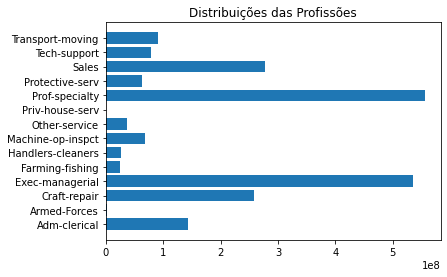

In [ ]:
occupations=a_renda.groupby(['occupation']).sum()
plt.barh(y=occupations.index,width=occupations['fnlwgt'])
plt.title('Distribuições das Profissões')
plt.show()

Podemos ver que as profissões não são muito bem distribuidas Além disso, trabalhadores de residências privadas pelo mundo são muito raros, o que pode contrastar com a realidade brasileira que possui muitas faxineiras domésticas. Além disso, a quantidade de militares é muito baixa, o que surpreende e pode até mesmo ser um erro na forma que os dados foram coletados.
Constatamos que Exec-manegerial e Prof-speciality contratam uma parte considerável do mercado de trabalho.
Vamos ver como se distribuem os níveis de renda entre as profissões.

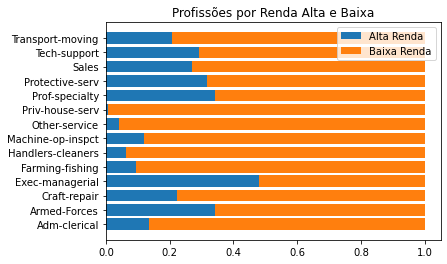

In [ ]:
occupations_a=a_renda.groupby(['occupation']).sum()
occupations_b=b_renda.groupby(['occupation']).sum()
total_ocp=df.groupby(['occupation']).sum().fnlwgt

plt.barh(y=occupations_a.index,width=occupations_a['fnlwgt']/total_ocp,label='Alta Renda')
plt.barh(y=occupations_b.index,width=occupations_b['fnlwgt']/total_ocp,left=occupations_a['fnlwgt']/total_ocp,label='Baixa Renda')

plt.legend()
plt.title('Profissões por Renda Alta e Baixa')
plt.show()

Quase nenhum trabalhador doméstico privado tem Alta Renda e Exec-manegerial e Prof-speciality possuem uma alta proporção de pessoas com altos salários. Isso pode justificar a quantidade de profissionais nessas áreas. Além disso, é interessante como dentro das forças armadas há uma alta incidência de Alta Renda.

4. A renda também está relacionada à etnia?

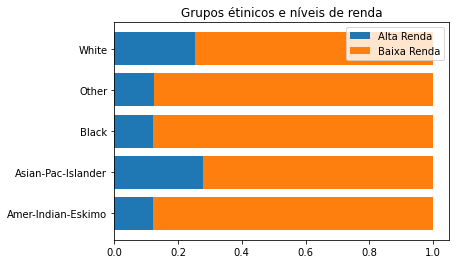

In [ ]:
et_a=a_renda.groupby(['race']).sum()
et_b=b_renda.groupby(['race']).sum()
total_et=df.groupby(['race']).sum().fnlwgt

plt.barh(y=et_a.index,width=et_a['fnlwgt']/total_et,label='Alta Renda')
plt.barh(y=et_b.index,width=et_b['fnlwgt']/total_et,left=et_a['fnlwgt']/total_et,label='Baixa Renda')

plt.title('Grupos étinicos e níveis de renda')
plt.legend()
plt.show()

Constatamos que pessoas brancas estão substancialmente mais representadas na Alta Renda que outras etinias. Interessantemente, Asian-Pac-Islanders são o grupo que mais possui pessoas abastadas proporcionalmente, o que possivelmente é um erro aleatório devido a poucas pessoas do grupo estarem representadas nos dados.

6. A renda está relacionada com o gênero?

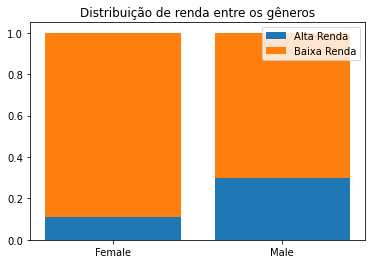

In [ ]:
gd_a=a_renda.groupby(['gender']).sum()
gd_b=b_renda.groupby(['gender']).sum()
total_gd=df.groupby(['gender']).sum().fnlwgt

plt.bar(x=gd_a.index,height=gd_a.fnlwgt/total_gd,label='Alta Renda')
plt.bar(x=gd_b.index,height=gd_b.fnlwgt/total_gd, bottom=gd_a.fnlwgt/total_gd,label='Baixa Renda')

plt.legend()
plt.title('Distribuição de renda entre os gêneros')
plt.show()

Como podemos ver, a proporção de mulheres na alta renda é consideravelmente baixa perto da dos homens e existe sim desigualdade de gênero.

### Conclusões
Nessa análise de dados, constatamos que os grupos mais representados são os jovens e que possivelmente houve um erro ou aproximação incoerente na coleta dos dados dos anos de estudo devido a sua distribuição particularmente específica.

Descobrimos que ao redor do mundo de fato as pessoas trabalham até 40 horas semanais e que a idade das pessoas que tem mais dinheiro é mais alta (o que indica coerência nos dados analisados com a realidade). Além disso, uma das coisas mais interessantes que esses dados nos mostraram é que a tendência entre pessoas que tiveram mais anos de estudos é ter semanas laborais com mais horas e não o contrário.

Vimos que pessoas com mais renda tem uma tendência maior a já terem se casado (o que faz sentido, pois tendem a ser mais velhas). Além disso, anos de estudo são um requisito muito forte para alguém pertencer à classe mais abastada, pois a proporção de pessoas com muito dinheiro entre as pouco estudadas é baixíssima, e os grupos com mais de 14 anos de estudo possuem mais da metade de seus membros na classe rica.

Descobrimos que a maioria das pessoas trabalha no meio privado e que a única classe laboral grupo que possui maioria abastada é Self-emp-inc. Além disso, funcionários do governo federal tendem a ganhar mais que outros trabalhadores públicos.

Poucas pessoas trabalham com serviços domésticos privados ao redor do mundo, o que pode indicar que empregados domésticos acessíveis no Brasil é algo específico daqui. Outro grupo que chama a atenção é a dos militares que embora pouco representados na pesquisa, se mostraram como um ramo que possui uma das maiores proporções de membros na alta renda. Exec-manegerial e Prof-speciality também possuem muitas pessoas abastadas, isso pode explicar o fato desses dois setores serem os que mais empregam gente.

Por fim vimos que desigualdades de raça e gênero existem sim, privilegiando pessoas brancas do sexo masculino em especial e de forma bastante substancial. O único grupo com maior proporção de abastados que brancos é Asian-Pac-Islanders, o que pode ser um erro do acaso devido a baixa representação desse grupo na amostra.

### Regressão Logística

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

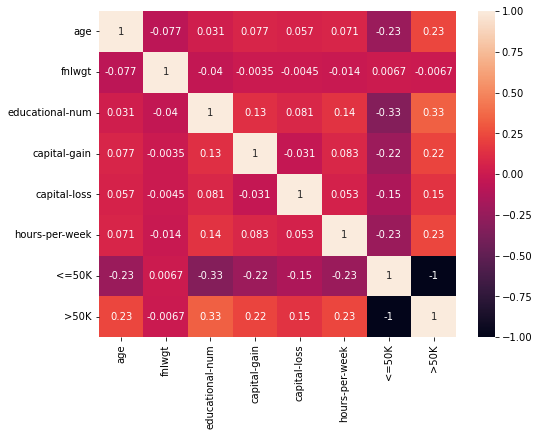

In [46]:
# Vamos separar os níveis de renda para as analizarmos de forma binária
# Em seguida vamos criar uma matriz de correlação para tentarmos
# achar features que predizem alta renda.
money=pd.get_dummies(df['income'])
df=pd.concat([df,money],axis=1)

corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Infelizmente não conseguimos nada muito poderoso. Vamos transformar variáveis categóricas que durante a análise se mostraram promissoras em variáveis numéricas com getdummies para conseguirmos achar melhores features.

In [47]:
genero=pd.get_dummies(df['gender'])
workclass= pd.get_dummies(df['workclass'])
maritalsts= pd.get_dummies(df['marital-status'])
occupation=pd.get_dummies(df['occupation'])
relationship=pd.get_dummies(df['relationship'])
race=pd.get_dummies(df['race'])

df=pd.concat([df, genero], axis=1)
df=pd.concat([df, workclass], axis=1)
df=pd.concat([df, maritalsts], axis=1)
df=pd.concat([df, occupation], axis=1)
df=pd.concat([df, relationship], axis=1)
df=pd.concat([df, race], axis=1)

In [48]:
#Como usamos muitas vezes getdummies, temos muitas colunas e é melhor dizer quais colunas não queremos.
#Vamos excluir as colunas categóricas, os pesos e as que envolvem o nível de renda.
X = df.loc[:,~df.columns.isin(['fnlwgt','workclass','education','marital-status','occupation','relationship','race','gender','native-country','income',">50K","<=50K"])]
y = df.loc[:, [">50K"]] #Selecionei o target como income
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score 

score = lr.score(X_test, y_test)
print(score)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8398860794665185


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
